# EDA on FRED Data

## Load the data

In [1]:
import pandas as pd

df = pd.read_excel(
    'data/UNRATE.xls', skiprows=10,
    index_col=0, parse_dates=['observation_date']
)

df

,UNRATE
observation_date,
1948-01-01,3.4
1948-02-01,3.8
...,...
2023-04-01,3.4
2023-05-01,3.7


## Plot the time series

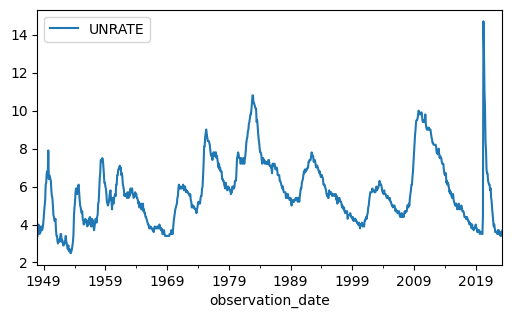

In [2]:
df.plot();

## Significant values

### Maximum

#### Value

In [3]:
value_max = df.UNRATE.fillna(0).max()
value_max

14.7

#### Time

In [4]:
idx_max = df.UNRATE.fillna(0).idxmax()
idx_max

Timestamp('2020-04-01 00:00:00')

In [ ]:
df.UNRATE.fillna(0).idxmax().strftime('%Y %B')

'2020 April'

### Minimum

#### Value

In [ ]:
value_min = df.UNRATE.fillna(0).min()
value_min

2.5

#### Time

In [ ]:
idx_min = df.UNRATE.fillna(0).idxmin()
idx_min

Timestamp('1953-05-01 00:00:00')

In [ ]:
df.UNRATE.fillna(0).idxmin().strftime('%Y %B')

'1953 May'

## Plot significant values

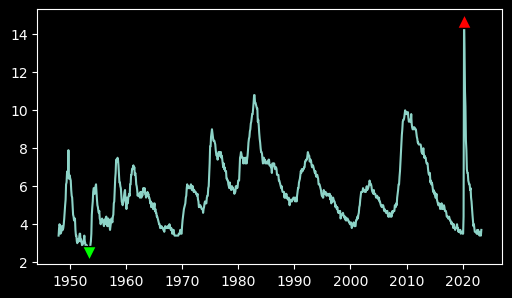

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df.UNRATE, zorder=0)

plt.scatter(
    x=idx_min, y=value_min, c='#00ff00', zorder=1,
    marker='v', edgecolors='black', s=100)

plt.scatter(
    x=idx_max, y=value_max, c='#ff0000', zorder=1,
    marker='^', edgecolors='black', s=100);

## Reporting with Pandas DataFrame

### Process the DataFrame

In [113]:
df['year'] = df.index.year
df['month'] = df.index.month
dff = df.pivot(index='year', columns='month', values='UNRATE')
dff

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1948,3.4,3.8,4.0,3.9,3.5,3.6,3.6,3.9,3.8,3.7,3.8,4.0
1949,4.3,4.7,5.0,5.3,6.1,6.2,6.7,6.8,6.6,7.9,6.4,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2022,4.0,3.8,3.6,3.6,3.6,3.6,3.5,3.7,3.5,3.7,3.6,3.5
2023,3.4,3.6,3.5,3.4,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Style the DataFrame

In [124]:
(dff
 .style
     .background_gradient(vmin=0, gmap=dff.fillna(0), axis=None)
     .format(precision=2)
)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1948,3.40,3.80,4.00,3.90,3.50,3.60,3.60,3.90,3.80,3.70,3.80,4.00
1949,4.30,4.70,5.00,5.30,6.10,6.20,6.70,6.80,6.60,7.90,6.40,6.60
1950,6.50,6.40,6.30,5.80,5.50,5.40,5.00,4.50,4.40,4.20,4.20,4.30
1951,3.70,3.40,3.40,3.10,3.00,3.20,3.10,3.10,3.30,3.50,3.50,3.10
1952,3.20,3.10,2.90,2.90,3.00,3.00,3.20,3.40,3.10,3.00,2.80,2.70
1953,2.90,2.60,2.60,2.70,2.50,2.50,2.60,2.70,2.90,3.10,3.50,4.50
1954,4.90,5.20,5.70,5.90,5.90,5.60,5.80,6.00,6.10,5.70,5.30,5.00
1955,4.90,4.70,4.60,4.70,4.30,4.20,4.00,4.20,4.10,4.30,4.20,4.20
1956,4.00,3.90,4.20,4.00,4.30,4.30,4.40,4.10,3.90,3.90,4.30,4.20


## Resample the data

### Process the `DataFrame`

In [193]:
s_resample = df.UNRATE.resample('Y').mean()
s_resample

observation_date
1948-12-31    3.750000
1949-12-31    6.050000
                ...   
2022-12-31    3.641667
2023-12-31    3.520000
Freq: A-DEC, Name: UNRATE, Length: 76, dtype: float64

### Plot the data

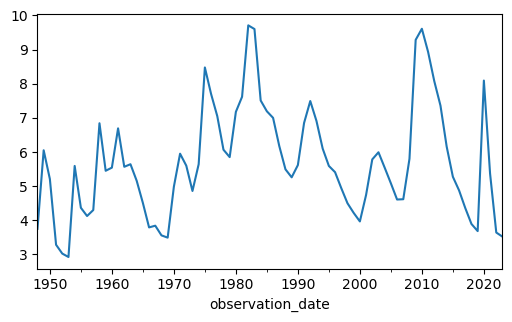

In [194]:
s_resample.plot();

### Reporting with Pandas DataFrame

#### Process the DataFrame

In [196]:
dff = df.UNRATE.resample('Y').mean().reset_index()
dff['year'] = dff.observation_date.dt.year
dff['decade'] = (dff.year//10)*10
dff['year_decade'] = dff.year.apply(lambda x: (x % 10)+1)
dff = dff.pivot_table(index='year_decade', columns='decade', values='UNRATE')
dff

decade,1940,1950,1960,1970,1980,1990,2000,2010,2020
year_decade,,,,,,,,,
1,NaN,5.208333,5.541667,4.983333,7.175000,5.616667,3.966667,9.608333,8.091667
2,NaN,3.283333,6.691667,5.950000,7.616667,6.850000,4.741667,8.933333,5.366667
3,NaN,3.025000,5.566667,5.600000,9.708333,7.491667,5.783333,8.075000,3.641667
4,NaN,2.925000,5.641667,4.858333,9.600000,6.908333,5.991667,7.358333,3.520000
5,NaN,5.591667,5.158333,5.641667,7.508333,6.100000,5.541667,6.158333,NaN
6,NaN,4.366667,4.508333,8.475000,7.191667,5.591667,5.083333,5.275000,NaN
7,NaN,4.125000,3.791667,7.700000,7.000000,5.408333,4.608333,4.875000,NaN
8,NaN,4.300000,3.841667,7.050000,6.175000,4.941667,4.616667,4.358333,NaN
9,3.75,6.841667,3.558333,6.066667,5.491667,4.500000,5.800000,3.891667,NaN


#### Style the DataFrame

In [181]:
(dff
 .style
     .background_gradient(vmin=0, gmap=dff.fillna(0), axis=None)
     .format(precision=2)
     .highlight_null()
     .highlight_null(props='background-color: transparent; color: transparent')
)

decade,1940,1950,1960,1970,1980,1990,2000,2010,2020
year_decade,,,,,,,,,
1,nan,5.21,5.54,4.98,7.17,5.62,3.97,9.61,8.09
2,nan,3.28,6.69,5.95,7.62,6.85,4.74,8.93,5.37
3,nan,3.02,5.57,5.60,9.71,7.49,5.78,8.07,3.64
4,nan,2.93,5.64,4.86,9.60,6.91,5.99,7.36,3.52
5,nan,5.59,5.16,5.64,7.51,6.10,5.54,6.16,nan
6,nan,4.37,4.51,8.47,7.19,5.59,5.08,5.27,nan
7,nan,4.12,3.79,7.70,7.00,5.41,4.61,4.88,nan
8,nan,4.30,3.84,7.05,6.17,4.94,4.62,4.36,nan
9,3.75,6.84,3.56,6.07,5.49,4.50,5.80,3.89,nan
